## <center>Examen mi-parcours </center>
<center>Master parcours SSD - UE Apprentissage statistique 2 </center>
<center>Automne 2021 </center>

In [1]:
# load package
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt

### Statistique descriptive

In [2]:
# load data
train_data_clinical = pd.read_csv("dataset/train-data_clinical.csv",sep=";")
train_data_clinical.shape
train_data_clinical.head()

,EXERCISE_FREQUENCY,SEX,ONE_LITER_OF_WATER_A_DAY_FREQUENCY,SEAFOOD_FREQUENCY,PROBIOTIC_FREQUENCY,OLIVE_OIL,FRUIT_FREQUENCY,SLEEP_DURATION,SUGAR_SWEETENED_DRINK_FREQUENCY,MILK_CHEESE_FREQUENCY,RED_MEAT_FREQUENCY,MEAT_EGGS_FREQUENCY,VEGETABLE_FREQUENCY
0,2,0,4,2,4,0,3,4,0,0,3,4,3
1,0,1,3,1,0,3,2,3,1,1,1,2,2
2,2,1,3,2,4,2,4,5,0,1,1,4,4
3,3,0,4,1,0,2,0,2,0,4,2,4,3
4,3,1,2,1,1,4,3,4,0,3,3,4,3


In [3]:
test_data_clinical = pd.read_csv("dataset/test-data_clinical.csv",sep=";",decimal=".")
test_data_clinical.shape

(850, 13)

In [4]:
train_data_otu = pd.read_csv("dataset/train-data_otu.csv",sep=";",low_memory=False,decimal=".") 
train_data_otu.shape
train_data_otu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965 entries, 0 to 4964
Columns: 7033 entries, OTU_1 to OTU_7033
dtypes: object(7033)
memory usage: 266.4+ MB


In [5]:
train_data_otu.head()

,OTU_1,OTU_2,OTU_3,OTU_4,OTU_5,OTU_6,OTU_7,OTU_8,OTU_9,OTU_10,...,OTU_7024,OTU_7025,OTU_7026,OTU_7027,OTU_7028,OTU_7029,OTU_7030,OTU_7031,OTU_7032,OTU_7033
0,"0,180439273676199","0,238664781994129",0,"0,00385995433293465",0,0,0,"0,000869848863759922","0,0167445906273785",0,...,0,0,0,0,0,0,0,0,0,0
1,"0,000883197173769044","0,000504684099296597","0,000378513074472447","0,00170330883512601","0,000378513074472447",0,"0,0159921773964609","0,0166230325205817",0,0,...,0,0,0,0,0,0,0,0,0,0
2,"0,715733658673924","0,00225235793721552","0,0245413166909108","0,00183004082398761",0,"0,0156726573131247","0,00168926845291164","0,000797710102763831","0,00183004082398761",0,...,0,0,0,0,0,0,0,0,0,0
3,"0,00238338440585632","0,00374531835205993","0,00340483486550902","0,154125524912042","0,00612870275791624",0,"0,145386448757235",0,0,"0,0396095789354216",...,0,0,0,0,0,0,0,0,0,0
4,"0,000683565935630874",0,"0,105553973227001","0,0656223298205639","0,210823127314156","0,0504699515807462","0,0238678439191114","0,0694958701224722","0,00262033608658502",0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_data_otu =pd.read_csv("dataset/test-data_otu.csv",sep=";",low_memory=False)
test_data_otu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Columns: 7033 entries, OTU_1 to OTU_7033
dtypes: int64(37), object(6996)
memory usage: 45.6+ MB


In [7]:
test_data_otu.head()

,OTU_1,OTU_2,OTU_3,OTU_4,OTU_5,OTU_6,OTU_7,OTU_8,OTU_9,OTU_10,...,OTU_7024,OTU_7025,OTU_7026,OTU_7027,OTU_7028,OTU_7029,OTU_7030,OTU_7031,OTU_7032,OTU_7033
0,"0,266402938683244",0,"0,00469059056230574","0,00514269567674484","0,132862390505793","0,000678157671658661","0,00299519638315908","0,0305170952246397","0,0394461712348121",0,...,0,0,0,0,0,0,0,0,0,0
1,"0,00141211445559272","0,228985507246377","0,00921590486807878","0,0130063173541434",0,0,"0,00594574507617986","0,0120401337792642","0,145893719806763",0,...,0,0,0,0,0,0,0,0,0,0
2,"0,0010618312505105","0,0414930980968717","0,0115984644286531","0,0495793514661439",0,0,"0,008739687984971","0,00996487788940619","0,00914808461978273","0,00269541778975741",...,0,0,0,0,0,0,0,0,0,0
3,"0,00216740948775872","0,210055558947433","0,234934977715367","0,0906954026497344","0,000366322730325417","0,000305268941937847","0,000366322730325417",0,"0,0721045240857195",0,...,0,0,0,0,0,0,0,0,0,0
4,"0,549270472768698","0,0304079218332384","0,000438154493274329","0,00635324015247776",0,0,"0,00030670814529203",0,0,0,...,0,"8,76308986548657e-05",0,0,0,0,0,0,0,0


In [8]:
def pre_processing(data):
    column_data = np.ravel(np.array(data.columns))
    for i in column_data:
        if data[i].dtypes=="object":
            data[i] = [x.replace(',','.') for x in data[i]]
    data = data.apply(pd.to_numeric)
    return data

In [10]:
train_data_otu = pre_processing(train_data_otu)

In [11]:
train_data_otu.head()
train_data_otu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965 entries, 0 to 4964
Columns: 7033 entries, OTU_1 to OTU_7033
dtypes: float64(7033)
memory usage: 266.4 MB


In [12]:
test_data_otu = pre_processing(test_data_otu)

In [13]:
test_data_otu.head()
test_data_otu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Columns: 7033 entries, OTU_1 to OTU_7033
dtypes: float64(6996), int64(37)
memory usage: 45.6 MB


On transforme toutes les variables de type object en float

In [14]:
train_label = pd.read_csv("dataset/train-label.txt",header=None)
train_label = np.array(train_label)
train_label
np.unique(train_label)

array(['Healthy', 'IBD'], dtype=object)

On transforme les valeurs du vecteur train label en 0 et 1

Healthy = 0

IBD = 1

In [15]:
def encoder_train_label(data):
    n = np.size(data)
    for i in range(n):
        if(data[i]=='Healthy'):
            data[i] = 0
        if(data[i]=='IBD'):
            data[i] = 1
    return data

In [16]:
train_label = np.ravel(encoder_train_label(train_label).astype(int))

### Pre-Traitement

In [17]:
size_x_train = train_data_otu.shape[0]
X = pd.concat([train_data_clinical,train_data_otu],axis=1)
X.head()

,EXERCISE_FREQUENCY,SEX,ONE_LITER_OF_WATER_A_DAY_FREQUENCY,SEAFOOD_FREQUENCY,PROBIOTIC_FREQUENCY,OLIVE_OIL,FRUIT_FREQUENCY,SLEEP_DURATION,SUGAR_SWEETENED_DRINK_FREQUENCY,MILK_CHEESE_FREQUENCY,...,OTU_7024,OTU_7025,OTU_7026,OTU_7027,OTU_7028,OTU_7029,OTU_7030,OTU_7031,OTU_7032,OTU_7033
0,2,0,4,2,4,0,3,4,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,3,1,0,3,2,3,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,3,2,4,2,4,5,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,4,1,0,2,0,2,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,1,2,1,1,4,3,4,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
ind_train =  np.random.randint(size_x_train,size=size_x_train)
X_train = X
X_train.head()

,EXERCISE_FREQUENCY,SEX,ONE_LITER_OF_WATER_A_DAY_FREQUENCY,SEAFOOD_FREQUENCY,PROBIOTIC_FREQUENCY,OLIVE_OIL,FRUIT_FREQUENCY,SLEEP_DURATION,SUGAR_SWEETENED_DRINK_FREQUENCY,MILK_CHEESE_FREQUENCY,...,OTU_7024,OTU_7025,OTU_7026,OTU_7027,OTU_7028,OTU_7029,OTU_7030,OTU_7031,OTU_7032,OTU_7033
0,2,0,4,2,4,0,3,4,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,3,1,0,3,2,3,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,3,2,4,2,4,5,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,4,1,0,2,0,2,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,1,2,1,1,4,3,4,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
size_test = test_data_clinical.shape[0]
ind_test = np.random.randint(size_test,size=size_test)
X_test = pd.concat([test_data_clinical,test_data_otu],axis=1)
X_test.shape

(850, 7046)

In [22]:
y_train = train_label

In [32]:
size_ytest = X_test.shape[0]
ind_y_test = np.random.randint(size_ytest,size=size_ytest)
y_test = y_train[ind_y_test]

<BarContainer object of 2 artists>

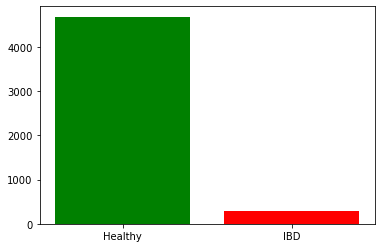

In [24]:
# Representation des effectifs par class
h = np.bincount(y_train)
plt.bar(['0','1'],h,color=['green','red'],tick_label=['Healthy','IBD'])

Methode 1 : Classification

In [25]:
# Classification
from sklearn.neighbors import KNeighborsClassifier
model_1 = KNeighborsClassifier(2)
model_1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [26]:
print("score de prédiction = ",model_1.score(X_test,y_test))

score de prédiction =  0.9411764705882353


In [27]:
vect_pred_proba = model_1.predict_proba(X_test)

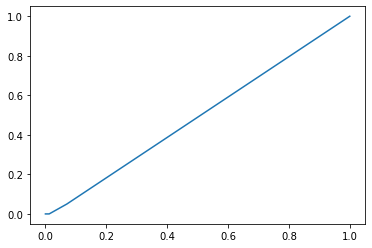

In [28]:
from sklearn.metrics import roc_curve
fpr,tpr,thres = roc_curve(y_test,vect_pred_proba[:,1])
plt.plot(fpr,tpr)

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,vect_pred_proba[:,1])

0.4895061728395062

Methode 2 : Regression logistique 

In [33]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression(max_iter=1000,random_state=0)
model_2.fit(X_train,y_train)
model_2.predict(X_test)
y_pred = model_2.predict_proba(X_test)

0.5219057258530942

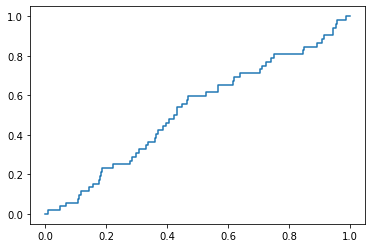

In [34]:
fpr,tpr,threshold = roc_curve(y_test,y_pred[:,1])
plt.plot(fpr,tpr)
roc_auc_score(y_test,y_pred[:,1])

Methode 3 : Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier(n_estimators=100,random_state=0) 
model_3.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

0.5815874571288584

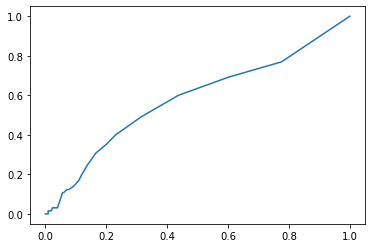

In [123]:
y_score = model_3.predict_proba(X_test)
fpr,tpr,thr = roc_curve(y_test,y_score[:,1])
plt.plot(fpr,tpr)
roc_auc_score(y_test,y_score[:,1])

Modèle 4 : 

In [143]:
from sklearn.svm import SVC
model_4 = SVC()
model_4.fit(X_train,y_train)

TypeError: score() missing 1 required positional argument: 'y'

In [144]:
model_4.score(X_test,y_test)

0.9235294117647059

In [151]:
y_score = model_4.predict(X_test)
#fpr,tpr,thr = roc_curve(y_test,y_score[:,1])